<a href="https://colab.research.google.com/github/ruedas91/FinTechruedas/blob/main/GC_after_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# After Training


In this activity, you will create a deep learning model from the credit score data, save it, and load it to evaluate its performance on unseen data.

1. Split the data into training and test sets using the `train_test_split` method from `sklearn`. Then scale the features data using an instance of the `StandardScaler`.

2. Using the training set, construct a shallow neural net model to predict the credit score features (you can use the same model that you constructed in the _Credit Scoring_ Activity).

> **Note** When fitting the model, you will not need a `validation-split` parameter because the data was seperated into training and testing datasets.

3. Using relative file paths, save the model and its weights.

4. Load the model and its weights.

5.  Use this loaded model to predict points for the test data and print the mean squared error metric for the predicted points vs. the actual points.

## The Dataset

This dataset is built around the same dataset used in the previous activity. The dataset contains `68` encoded features (columns from `0` to `67`), with all personal identifying information removed. The last two columns of the dataset (columns `68` and `69`) are preliminary credit score quality indicators that have been manually assigned by staff at the firm.

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import model_from_json
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [2]:
# Upload credit_scores.csv to Colab
from google.colab import files

csv_file = files.upload()

Saving credit_scores.csv to credit_scores.csv


In [3]:
# Read in data
df = pd.read_csv("credit_scores.csv", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
0,7.161286,7.835325,2.911583,0.984049,-1.499546,-2.094097,0.576000,-1.205671,1.849122,-0.425598,...,-1.504263,0.351267,-1.018726,-0.174878,-1.089543,-0.668840,-0.914772,-0.836250,-15.75,-47.95
1,0.225763,-0.094169,-0.603646,0.497745,0.874036,0.290280,-0.077659,-0.887385,0.432062,-0.093963,...,-0.495712,-0.465077,-0.157861,-0.157189,0.380951,1.088478,-0.123595,1.391141,14.91,-23.51
2,-0.692525,-0.517801,-0.788035,1.214351,-0.907214,0.880213,0.406899,-0.694895,-0.901869,-1.701574,...,-0.637167,0.147260,0.217914,2.718442,0.972919,2.081069,1.375763,1.063847,12.65,-8.00
3,-0.735562,-0.684055,2.058215,0.716328,-0.011393,0.805396,1.497982,0.114752,0.692847,0.052377,...,-0.178325,-0.065059,-0.724247,-1.020687,-0.751380,-0.385005,-0.012326,-0.392197,9.03,38.74
4,0.570272,0.273157,-0.279214,0.083456,1.049331,-0.869295,-0.265858,-0.401676,-0.872639,1.147483,...,-0.919463,-0.667912,-0.820172,-0.190488,0.306974,0.119658,0.271838,1.289783,34.03,-6.85


## Prepare the data

In [5]:
# Define the features set 'X', and the target 'y' set

# The features dataset consists of columns 0 to 67
X = df.iloc[:, 0:68]

# The target conststs of columns 68 and 69
y = df.iloc[:, 68:70]

# View data for the features set
X.head()

,0,1,2,3,4,5,6,7,8,9,...,58,59,60,61,62,63,64,65,66,67
0,7.161286,7.835325,2.911583,0.984049,-1.499546,-2.094097,0.576000,-1.205671,1.849122,-0.425598,...,-0.944584,-0.043610,-1.504263,0.351267,-1.018726,-0.174878,-1.089543,-0.668840,-0.914772,-0.836250
1,0.225763,-0.094169,-0.603646,0.497745,0.874036,0.290280,-0.077659,-0.887385,0.432062,-0.093963,...,-0.082645,-0.947933,-0.495712,-0.465077,-0.157861,-0.157189,0.380951,1.088478,-0.123595,1.391141
2,-0.692525,-0.517801,-0.788035,1.214351,-0.907214,0.880213,0.406899,-0.694895,-0.901869,-1.701574,...,-0.797954,-0.556109,-0.637167,0.147260,0.217914,2.718442,0.972919,2.081069,1.375763,1.063847
3,-0.735562,-0.684055,2.058215,0.716328,-0.011393,0.805396,1.497982,0.114752,0.692847,0.052377,...,-0.805626,0.166616,-0.178325,-0.065059,-0.724247,-1.020687,-0.751380,-0.385005,-0.012326,-0.392197
4,0.570272,0.273157,-0.279214,0.083456,1.049331,-0.869295,-0.265858,-0.401676,-0.872639,1.147483,...,-0.180181,-0.500785,-0.919463,-0.667912,-0.820172,-0.190488,0.306974,0.119658,0.271838,1.289783


### Step 1: Split the data into training and test sets using the `train_test_split` method from `sklearn`. Then scale the features data using an instance of the `StandardScaler`.

In [6]:
# Split the data into traning and testing sets using the train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [7]:
# Scale the data for the features set X_tain and X_test

# Fit the training data to a StandardScaler instance
scaler = StandardScaler().fit(X_train)

# Scale the training data
X_train_scaled = scaler.transform(X_train)

# Scale the testing data
X_test_scaled = scaler.transform(X_test)


## Step 2: Using the training set, construct a shallow neural net model to predict the credit score data (you can use the same model that you constructed in the _Credit Scoring_ Activity).

In [9]:
# Create a shallow, 1 hidden layer, neural network

# Instantiate an instance of the Sequential model
nn = Sequential(0)

# Create 1 hidden layer
nn.add(Dense(units=8, input_dim=68, activation="relu"))

# Create the output layer
nn.add(Dense(units=2, activation="linear"))

# Compile the model 
# Set the parameters as mean_squared_error, adam, and mse.
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

In [10]:
# Fit the model using the training data
model_1 = nn.fit(X_train_scaled, y_train, epochs=800, verbose=0)

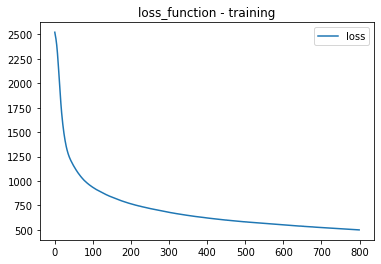

In [12]:
# Plot the train function
plt.plot(model_1.history["loss"])
plt.title("loss_function - training")
plt.legend(["loss"])
plt.show()

## Step 3: Using relative file paths, save the model and its weights.

In [14]:
# Save model in JSON format
nn_json = nn.to_json()

# Define a relative path to save the model
# The model should be saved with a .json file extension
file_path = "model.json"

# Write the model to the the file 
with open(file_path, "w") as json_file:
    json_file.write(nn_json)

# Define a relative path to save the model weights
# The model weights should be saved with a .h5 file extension
file_path = "model.h5"

# Save the weights to the file path
nn.save_weights(file_path)


## Step 4: Load the model and its weights.

In [17]:
# Load the model to predict values

# Identify the relative path of the model's location
file_path = "model.json"

# Read in the model and save it as the variable loaded_model
with open(file_path, "r") as json_file:
    model_json = json_file.read()
loaded_model = model_from_json(model_json)

# Identify the relative path for the model's weights
file_path = "model.h5"

# Load the model's weights to the variable loaded_model
loaded_model.load_weights(file_path)

## Step 5: Use this loaded model to predict points for the test data and print the mean squared error metric for the predicted points vs. the actual points.

In [18]:
# Predict values using the testing data
y_pred = loaded_model.predict(X_test_scaled)

# View the model's predictions
y_pred[:5, :]

9/9 [==============================] - 0s 1ms/step


array([[ 17.52011 ,  63.055336],
       [ 45.20957 ,  23.514175],
       [ 38.62733 , 101.726746],
       [ 29.128769,  33.875988],
       [ 21.229645,  76.79244 ]], dtype=float32)

In [19]:
# Import
from sklearn.metrics import mean_squared_error

# Evaluate the model with the MSE metric
print(mean_squared_error(y_test, y_pred))

1355.1552430391969
